<a href="https://colab.research.google.com/github/OjChi/DS-Lab/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment 2: Principal Component Analysis
Name: Ojasa Chitre

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing

##Step 1: Load the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Engineering/BE/Sem8/DS/Lab/Lab2/auto-mpg.csv')

##Step 2: Data Preprocessing

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [ ]:
data['mpg'].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [ ]:
categorical_columns = []
for col in data.columns:
  if np.issubdtype(data[col].dtype,object):
    print('\nCategorical')
    print(col,data[col].mode()[0])
    # horse_data[col] = horse_data[col].fillna(horse_data[col].mode()[0])
    data[col].replace({"?": data[col].mode()[0]}, inplace=True)
    categorical_columns.append(col)
    
  else:
    print('\nNon-categorical')
    print(col,data[col].mean())
    data[col] = data[col].fillna(data[col].median())


Non-categorical
mpg 23.514572864321615

Non-categorical
cylinders 5.454773869346734

Non-categorical
displacement 193.42587939698493

Categorical
horsepower 150

Non-categorical
weight 2970.424623115578

Non-categorical
acceleration 15.568090452261291

Non-categorical
model year 76.01005025125629

Non-categorical
origin 1.5728643216080402

Categorical
car name ford pinto


In [ ]:
data['horsepower'].astype(str).astype(int)

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: int64

In [ ]:
labelencoder = preprocessing.LabelEncoder()

for col in categorical_columns:
  data[col] = labelencoder.fit_transform(data[col])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.1 KB


##Step 3: EDA

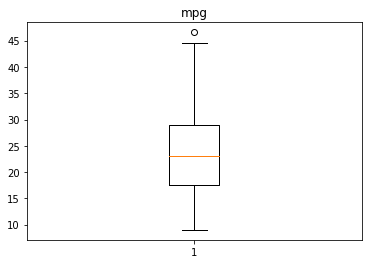

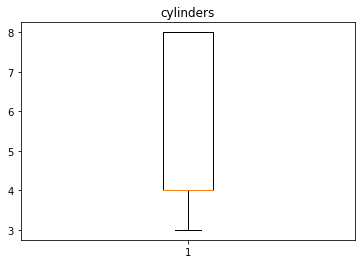

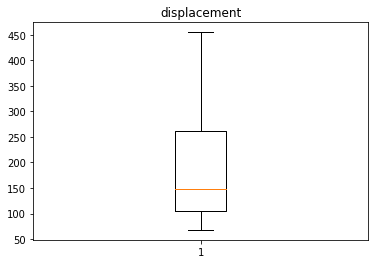

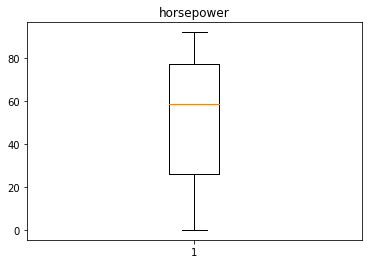

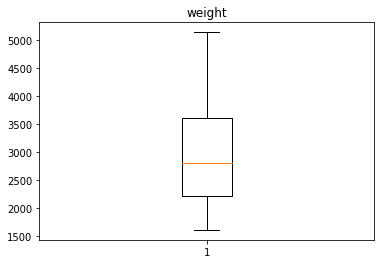

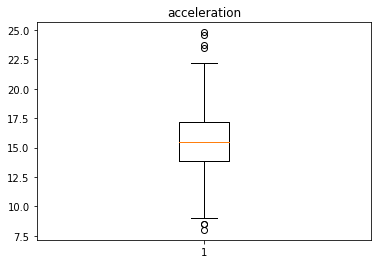

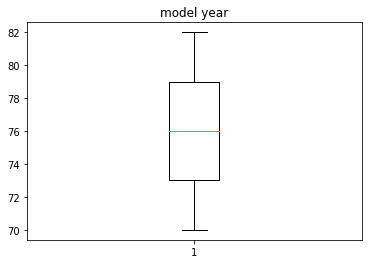

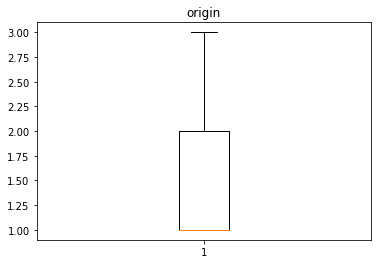

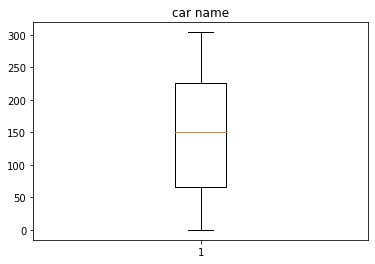

In [ ]:
for col in data.columns:
  plt.boxplot(data[col])
  plt.title(col)
  plt.show()

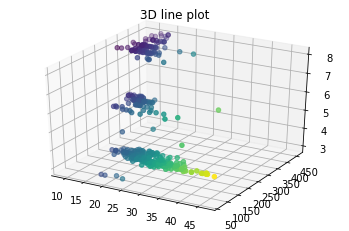

In [ ]:
fig = plt.figure()
 
ax = plt.axes(projection ='3d')

z = data['cylinders']
x = data['mpg']
y = data['displacement']

ax.scatter(x, y, z, c=x)
ax.set_title('3D line plot')
plt.show()

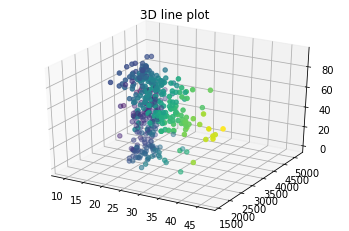

In [ ]:
fig = plt.figure()
 
ax = plt.axes(projection ='3d')

z = data['horsepower']
x = data['mpg']
y = data['weight']

ax.scatter(x, y, z, c=x)
ax.set_title('3D line plot')
plt.show()

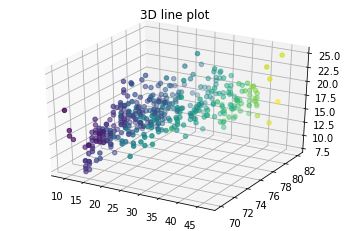

In [ ]:
fig = plt.figure()
 
ax = plt.axes(projection ='3d')

z = data['acceleration']
x = data['mpg']
y = data['model year']

ax.scatter(x, y, z, c=x)
ax.set_title('3D line plot')
plt.show()

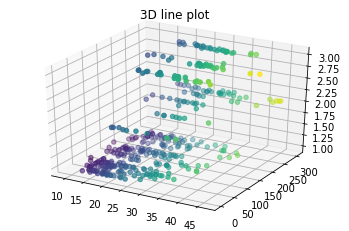

In [ ]:
fig = plt.figure()
 
ax = plt.axes(projection ='3d')

z = data['origin']
x = data['mpg']
y = data['car name']

ax.scatter(x, y, z, c=x)
ax.set_title('3D line plot')
plt.show()

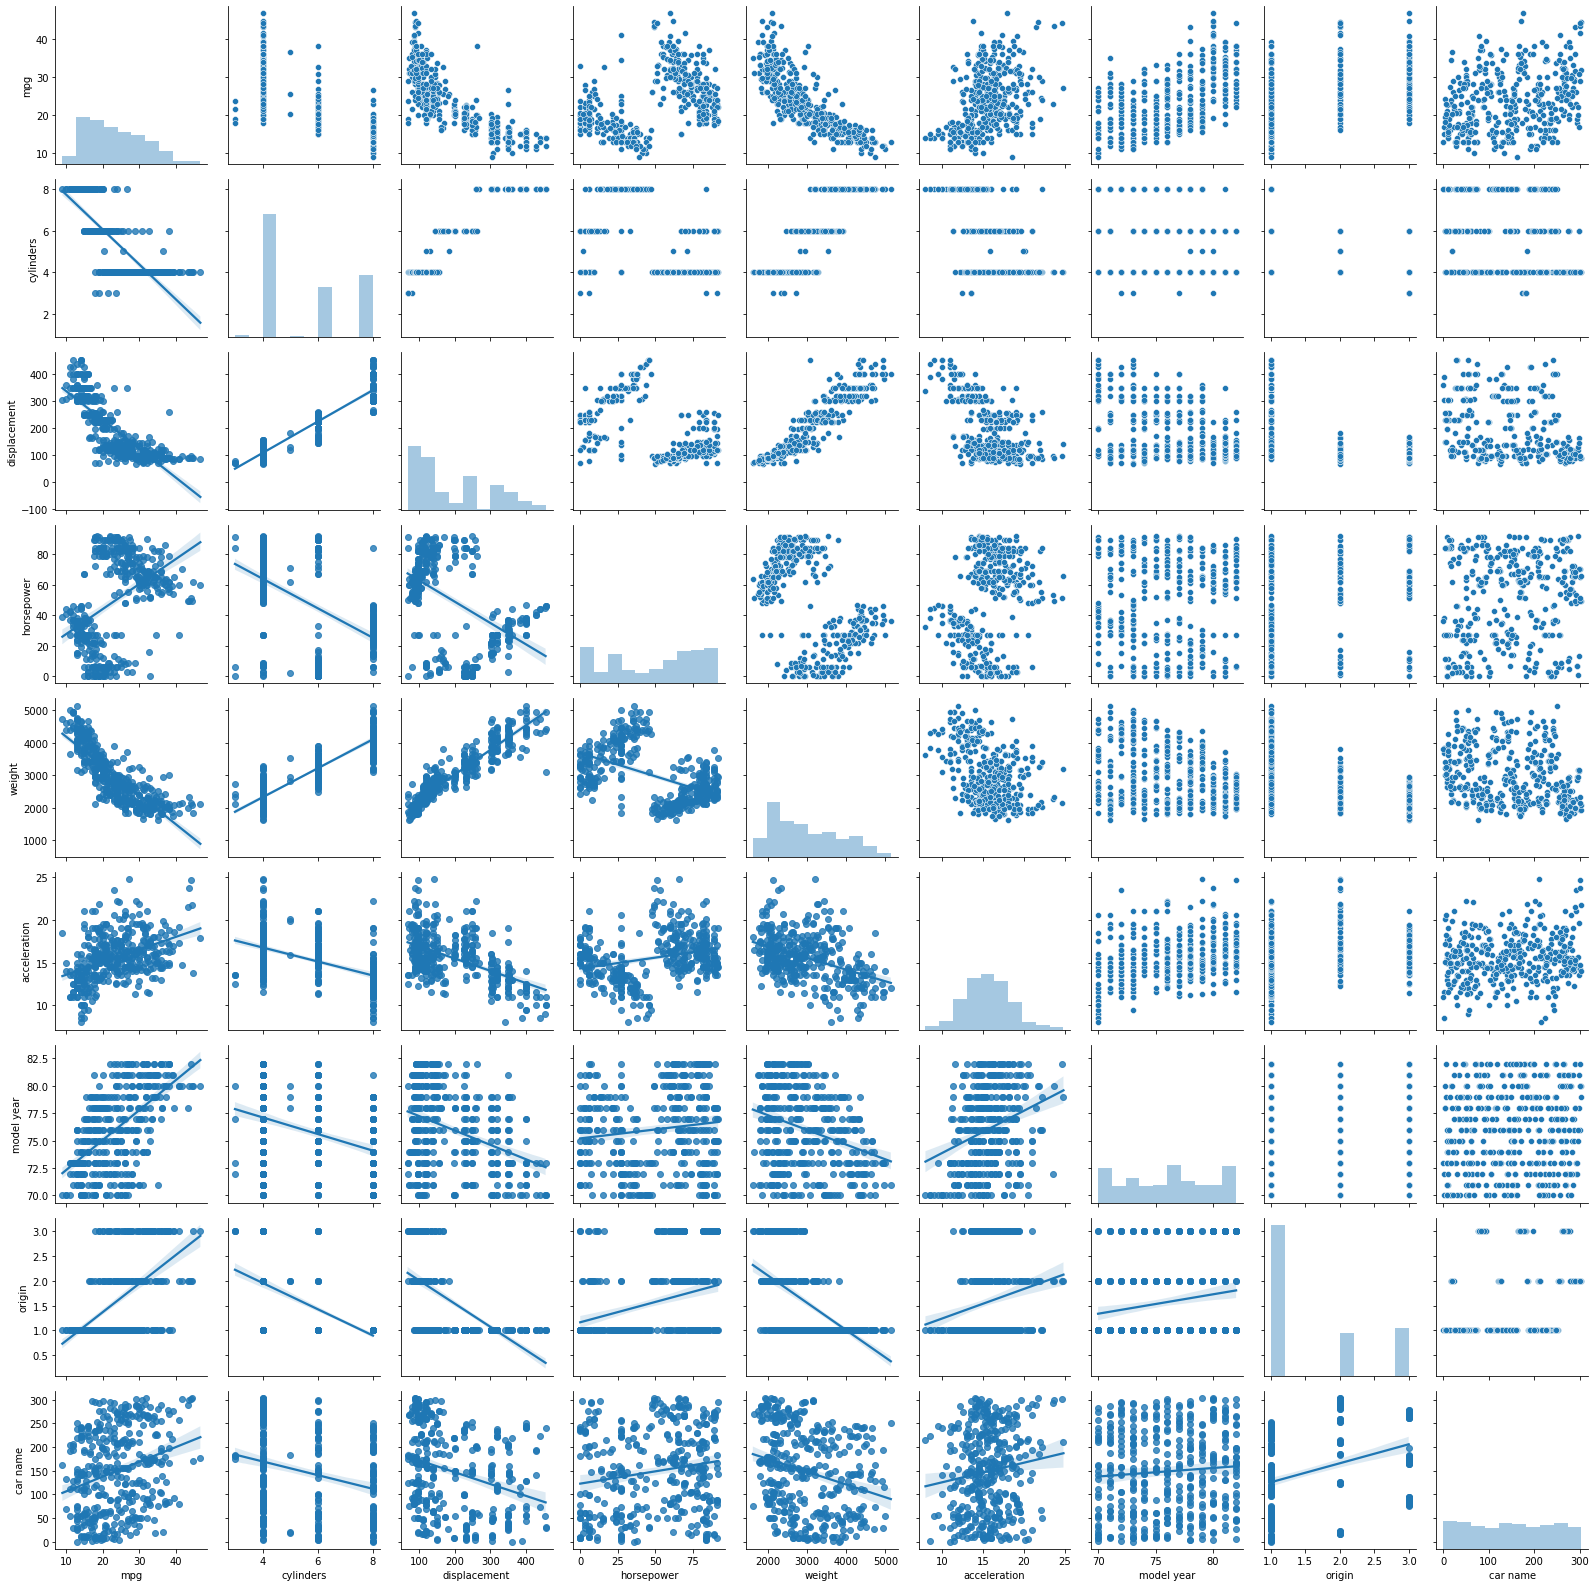

In [ ]:
g = sns.PairGrid(data)
g = g.map_diag(plt.hist, alpha=0.4)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.regplot)

##Step 4: Normalization and Covariance matrix

In [ ]:
data_min_max_scaled = data.copy()
  
# apply normalization techniques
for column in data_min_max_scaled.columns:
    data_min_max_scaled[column] = (data_min_max_scaled[column] - data_min_max_scaled[column].min()) / (data_min_max_scaled[column].max() - data_min_max_scaled[column].min())    
  
# view normalized data
print(data_min_max_scaled)

          mpg  cylinders  displacement  ...  model year  origin  car name
0    0.239362        1.0      0.617571  ...         0.0     0.0  0.161184
1    0.159574        1.0      0.728682  ...         0.0     0.0  0.118421
2    0.239362        1.0      0.645995  ...         0.0     0.0  0.759868
3    0.186170        1.0      0.609819  ...         0.0     0.0  0.046053
4    0.212766        1.0      0.604651  ...         0.0     0.0  0.529605
..        ...        ...           ...  ...         ...     ...       ...
393  0.478723        0.2      0.186047  ...         1.0     0.0  0.503289
394  0.930851        0.2      0.074935  ...         1.0     0.5  0.990132
395  0.611702        0.2      0.173127  ...         1.0     0.0  0.391447
396  0.505319        0.2      0.134367  ...         1.0     0.0  0.523026
397  0.585106        0.2      0.131783  ...         1.0     0.0  0.226974

[398 rows x 9 columns]


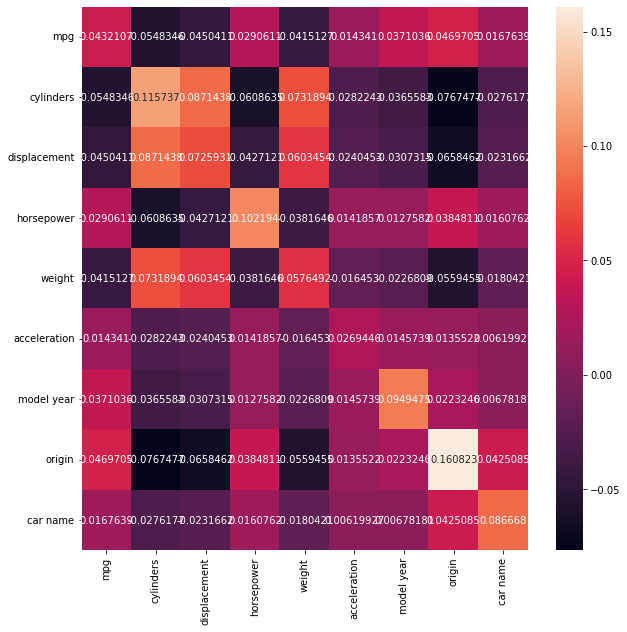

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
mpg,0.043211,-0.054835,-0.045041,0.029061,-0.041513,0.014341,0.037104,0.046971,0.016764
cylinders,-0.054835,0.115737,0.087144,-0.060863,0.073189,-0.028224,-0.036558,-0.076748,-0.027618
displacement,-0.045041,0.087144,0.072593,-0.042712,0.060345,-0.024045,-0.030732,-0.065846,-0.023166
horsepower,0.029061,-0.060863,-0.042712,0.102194,-0.038165,0.014186,0.012758,0.038481,0.016076
weight,-0.041513,0.073189,0.060345,-0.038165,0.057649,-0.016453,-0.022681,-0.055945,-0.018042


In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
covMatrix = pd.DataFrame.cov(data_min_max_scaled)
sns.heatmap(covMatrix, annot=True, fmt='g',ax=ax)
plt.show()

covMatrix.head()

In [ ]:
X = data_min_max_scaled.drop(['mpg'],axis=1)
y = data_min_max_scaled['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Step 5: Apply PCA

In [ ]:
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [ ]:
explained_variance

array([0.67325973, 0.17647642])

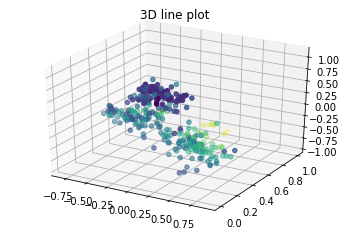

In [ ]:
fig = plt.figure()
 
ax = plt.axes(projection ='3d')

z = X_train[:,0]
x = X_train[:,1]
y = y_train

ax.scatter(x, y, z, c=y)
ax.set_title('3D line plot')
plt.show()

##Step 6: Build Model and Summarize

In [ ]:
from sklearn.linear_model import LinearRegression 
 
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

In [ ]:
predict = LinReg.predict(X_test)

In [ ]:
score = LinReg.score(X_test ,y_test)
score

0.7544412997159784

In [ ]:
score = LinReg.score(X_train ,y_train)
score

0.7097295994124482

In [ ]:
r2_score(y_test, predict)

0.7544412997159784

##Step 7: Tuning Model

normal ==> Test - 0.8189830326174267 Train - 0.8218582658132483

n_components = 7 ==>  Train - 0.8098790189771731 Test - 0.8095793815597687

n_components = 6 ==>  Train - 0.7820641298403768 Test - 0.7742545586111805

n_components = 5 ==>  Train - 0.7611965440079933 Test - 0.7716881190000083

n_components = 4 ==>  Train - 0.7629143353109191 Test - 0.7704133092273989

n_components = 3 ==>  Train - 0.7677697515701636 Test - 0.7692272949169942

n_components = 2 ==>  Train - 0.7544412997159784 Test - 0.7097295994124482


##Conclusion:
1.   I was able to understand how the change in the number of components affects the final result


##Trial

In [ ]:
a = data_min_max_scaled - ((1/len(data_min_max_scaled))*np.ones_like(data_min_max_scaled)*wine_data_min_max_scaled)

In [ ]:
np.transpose(a)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598
fixed acidity,0.247633,0.283009,0.283009,0.583706,0.247633,0.247633,0.291853,0.238789,0.283009,0.256477,0.185724,0.256477,0.088440,0.283009,0.380293,0.380293,0.344917,0.309541,0.247633,0.291853,0.380293,0.265321,0.291853,0.344917,0.203413,0.150348,0.265321,0.291853,0.221101,0.283009,0.185724,0.203413,0.327229,0.203413,0.053064,0.283009,0.283009,0.309541,0.097284,0.238789,...,0.283009,0.283009,0.283009,0.229945,0.229945,0.229945,0.185724,0.185724,0.229945,0.212257,0.141504,0.159192,0.159192,0.238789,0.123816,0.088440,0.256477,0.300697,0.141504,0.194569,0.141504,0.247633,0.141504,0.132660,0.141504,0.185724,0.229945,0.256477,0.106128,0.229945,0.176880,0.150348,0.070752,0.150348,0.194569,0.141504,0.114972,0.150348,0.114972,0.123816
volatile acidity,0.397012,0.520222,0.438082,0.109521,0.397012,0.369632,0.328562,0.362787,0.314871,0.260111,0.314871,0.260111,0.338829,0.335407,0.342252,0.342252,0.109521,0.301181,0.321716,0.136901,0.068450,0.184816,0.212196,0.253266,0.191661,0.184816,0.198506,0.212196,0.403857,0.359364,0.379899,0.386744,0.366209,0.331984,0.136901,0.359364,0.328562,0.177971,0.691348,0.225886,...,0.328562,0.328562,0.328562,0.393589,0.393589,0.393589,0.376477,0.027380,0.393589,0.301181,0.266956,0.164281,0.177971,0.390167,0.314871,0.130056,0.273801,0.123211,0.397012,0.376477,0.301181,0.157436,0.301181,0.407279,0.232731,0.136901,0.184816,0.130056,0.335407,0.369632,0.414124,0.294336,0.424392,0.266956,0.342252,0.328562,0.294336,0.266956,0.359364,0.130056
citric acid,0.000000,0.000000,0.039975,0.559650,0.000000,0.000000,0.059962,0.000000,0.019987,0.359775,0.079950,0.359775,0.000000,0.289819,0.179887,0.189881,0.559650,0.279825,0.079950,0.509681,0.479700,0.309806,0.209869,0.109931,0.139912,0.159900,0.239850,0.209869,0.000000,0.000000,0.069956,0.000000,0.119925,0.119925,0.249844,0.000000,0.139912,0.279825,0.089944,0.359775,...,0.259837,0.259837,0.259837,0.129919,0.129919,0.129919,0.019987,0.639600,0.129919,0.129919,0.139912,0.529669,0.139912,0.319800,0.199875,0.779512,0.399750,0.629606,0.149906,0.149906,0.089944,0.329794,0.089944,0.099937,0.289819,0.439725,0.439725,0.409744,0.109931,0.329794,0.199875,0.149906,0.089944,0.129919,0.079950,0.079950,0.099937,0.129919,0.119925,0.469706
residual sugar,0.068450,0.116366,0.095830,0.068450,0.068450,0.061605,0.047915,0.020535,0.075295,0.355942,0.061605,0.355942,0.047915,0.047915,0.198506,0.205351,0.061605,0.054760,0.239576,0.061605,0.061605,0.095830,0.047915,0.095830,0.102675,0.034225,0.061605,0.047915,0.068450,0.075295,0.102675,0.109521,0.095830,0.670813,0.061605,0.314871,0.102675,0.082140,0.041070,0.342252,...,0.075295,0.075295,0.075295,0.075295,0.075295,0.075295,0.068450,0.082140,0.075295,0.047915,0.068450,0.088985,0.088985,0.088985,0.102675,0.889854,0.088985,0.047915,0.287491,0.061605,0.054760,0.102675,0.054760,0.116366,0.082140,0.102675,0.116366,0.102675,0.061605,0.109521,0.472307,0.061605,0.054760,0.095830,0.068450,0.075295,0.088985,0.095830,0.075295,0.184816
chlorides,0.106778,0.143483,0.133472,0.105110,0.106778,0.105110,0.095099,0.088425,0.101773,0.098436,0.141814,0.098436,0.128467,0.170177,0.273618,0.263608,0.133472,0.593952,0.123462,0.548905,0.108446,0.116788,0.156830,0.120125,0.121794,0.113452,0.113452,0.156830,0.113452,0.116788,0.128467,0.155162,0.118457,0.101773,0.151825,0.123462,0.123462,0.090094,0.266945,0.103441,...,0.113452,0.113452,0.113452,0.106778,0.106778,0.106778,0.081752,0.078415,0.106778,0.108446,0.073410,0.363712,0.043379,0.095099,0.105110,0.103441,0.080083,0.115120,0.106778,0.176851,0.068405,0.093431,0.068405,0.068405,0.103441,0.081752,0.090094,0.088425,0.090094,0.093431,0.101773,0.108446,0.128467,0.106778,0.093431,0.130136,0.083420,0.106778,0.105110,0.0917

In [ ]:
n_cov = pd.DataFrame(np.dot(np.transpose(a),a),columns=wine_data.columns)
n_cov

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,210.930927,139.114930,174.625447,61.732448,68.040586,104.562723,71.935800,280.462175,215.982126,107.863423,161.122335,282.071637
1,139.114930,148.611784,99.812368,50.108359,57.144383,93.155344,65.528663,219.275235,206.194394,82.469572,132.343716,222.832667
2,174.625447,99.812368,177.828467,52.885434,59.499999,87.870272,63.165266,227.860786,174.123816,94.903520,140.285446,239.514139
3,61.732448,50.108359,52.885434,35.005281,23.257776,41.803009,29.270509,95.462478,79.006901,35.310092,56.853479,94.847693
4,68.040586,57.144383,59.499999,23.257776,35.202265,42.255816,29.461991,102.118030,86.439519,44.261093,58.073218,103.463790
5,104.562723,93.155344,87.870272,41.803009,42.255816,104.737946,66.091894,163.300426,152.471251,66.976829,101.455395,174.468897
6,71.935800,65.528663,63.165266,29.270509,29.461991,66.091894,54.219095,113.778899,101.194780,45.681431,64.818406,114.848441
7,280.462175,219.275235,227.860786,95.462478,102.118030,163.300426,113.778899,414.416969,342.865520,157.164317,225.659662,406.483318
8,215.982126,206.194394,174.123816,79.006901,86.439519,152.471251,101.194780,342.865520,346.540478,137.243991,230.053755,376.810140
9,107.863423,82.469572,94.903520,35.310092,44.261093,66.976829,45.681431,157.164317,137.243991,78.104268,100.150664,172.016978


In [ ]:
len(wine_data_min_max_scaled)

1599

In [ ]:
cov = (n_cov/len(wine_data_min_max_scaled))

In [ ]:
cov_df = pd.DataFrame(cov,columns=wine_data.columns,index=wine_data.columns)
cov_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
egnvalues, egnvectors = np.linalg.eigh(covMatrix)

In [ ]:
covMatrix = pd.DataFrame.cov(wine_data_min_max_scaled)
covMatrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,0.023740,-0.004840,0.020161,0.001708,0.001134,-0.003491,-0.002027,0.014263,-0.012793,0.002862,-0.001558,0.003087
volatile acidity,-0.004840,0.015041,-0.013200,0.000023,0.000591,-0.000190,0.001090,0.000374,0.003503,-0.003249,-0.004067,-0.007736
citric acid,0.020161,-0.013200,0.037947,0.002701,0.003120,-0.001750,0.000805,0.009851,-0.012833,0.006184,0.003510,0.007122
residual sugar,0.001708,0.000023,0.002701,0.009326,0.000422,0.002661,0.002279,0.004754,-0.001006,0.000054,0.000666,0.000214
chlorides,0.001134,0.000591,0.003120,0.000422,0.006174,0.000064,0.000433,0.002184,-0.002531,0.002961,-0.002849,-0.001636
free sulfur dioxide,-0.003491,-0.000190,-0.001750,0.002661,0.000064,0.021705,0.011434,-0.000448,0.001260,0.000772,-0.001676,-0.001205
total sulfur dioxide,-0.002027,0.001090,0.000805,0.002279,0.000433,0.011434,0.013511,0.001148,-0.000940,0.000507,-0.003919,-0.003475
density,0.014263,0.000374,0.009851,0.004754,0.002184,-0.000448,0.001148,0.019202,-0.005756,0.002089,-0.011272,-0.003915
pH,-0.012793,0.003503,-0.012833,-0.001006,-0.002531,0.001260,-0.000940,-0.005756,0.014778,-0.002426,0.004098,-0.001134
sulphates,0.002862,-0.003249,0.006184,0.000054,0.002961,0.000772,0.000507,0.002089,-0.002426,0.010302,0.001558,0.004121


In [ ]:
egnvalues

array([0.00116619, 0.0028985 , 0.00477781, 0.00647314, 0.00742985,
       0.01024632, 0.01048424, 0.01417395, 0.0154323 , 0.03022584,
       0.04912583, 0.07225939])

In [ ]:
egnvectors

array([[ 5.69730529e-01,  1.35367950e-01,  5.67120678e-02,
         8.47194676e-02,  3.60808354e-01,  4.50038012e-02,
         3.37003065e-01,  2.83306326e-01, -1.86508297e-01,
         1.44624752e-01,  1.28708151e-01, -4.98377360e-01],
       [ 5.36444073e-03, -3.07362480e-01, -1.56481207e-01,
        -5.36460133e-01, -1.28654507e-01,  4.76365036e-01,
         1.13066724e-01,  4.15216050e-01, -2.02608566e-01,
         1.32855188e-01,  2.13490289e-01,  2.45521421e-01],
       [-4.37709113e-02, -2.32797291e-01, -1.75800716e-01,
        -4.38086444e-01, -1.45547971e-01, -9.64335453e-02,
        -1.78348600e-01, -4.20399341e-04,  4.37209728e-01,
        -1.37799675e-01, -7.48618726e-02, -6.65602334e-01],
       [ 2.86329096e-01, -1.81201789e-01, -4.69576821e-02,
         3.93839653e-01, -6.03361340e-01, -1.55541678e-01,
        -3.35635479e-01,  3.95731820e-01, -2.01975103e-01,
        -1.48590835e-01,  5.57372797e-02, -6.62878088e-02],
       [ 1.13206343e-01,  6.72259041e-01, -4.6887614

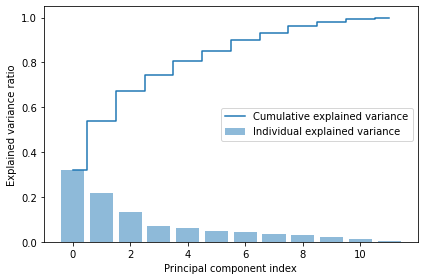

In [ ]:
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()